In [1]:
from keras.datasets import mnist
from keras.layers import Input, Dense
from keras.models import Model

Using TensorFlow backend.


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
(X_train, _), (X_test, _) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

X_train = X_train.reshape(len(X_train), np.prod(X_train.shape[1:]))
X_test = X_test.reshape(len(X_test), np.prod(X_test.shape[1:]))
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [5]:
#Encoded image will have a compression of 784/32=24.5 %

#We need to take the input image of dimension 784 and convert it to keras tensors.
input_img= Input(shape=(784,))

In [0]:
#Input image will be Encoded to 32 units and the activation will be relu and the input is the tensors of input image
encoded = Dense(units=32, activation='relu')(input_img)

In [0]:
#Decoder will have 784 units as it needs to reconstruct the input image back to its original dimension.

#As decoded is the output layer of the autoencoder we will use sigmoid activation function. encoded image will be the input to the decoder

decoded = Dense(units=784, activation='sigmoid')(encoded)

In [0]:
#We now create the autoencoder with input as the input image and output as the decoder
autoencoder=Model(input_img, decoded)

In [15]:
autoencoder.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_4 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [0]:
# We can also extract the encoder which takes input as input images and the output is the encoded image.
encoder = Model(input_img, encoded)

In [17]:
encoder.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                25120     
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________


In [18]:
# We now compile the autoencoder model with adadelta optimizer. As pixels have a value of 0 0r 1 we use binary_crossentropy as the loss function and the metrics uses for the performance of the model is accuracy
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [19]:
# We now train the autoencoder using the training data with 50 epochs and batch size of 256. We also shuffle the training data

autoencoder.fit(X_train, X_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))




Train on 60000 samples, validate on 10000 samples
Epoch 1/5





60000/60000 [==============================] - 5s 81us/step - loss: 0.3539 - acc: 0.7544 - val_loss: 0.2703 - val_acc: 0.7964
Epoch 2/5
60000/60000 [==============================] - 4s 70us/step - loss: 0.2622 - acc: 0.7975 - val_loss: 0.2502 - val_acc: 0.7976
Epoch 3/5
60000/60000 [==============================] - 4s 71us/step - loss: 0.2391 - acc: 0.7973 - val_loss: 0.2263 - val_acc: 0.7963
Epoch 4/5
60000/60000 [==============================] - 4s 70us/step - loss: 0.2185 - acc: 0.7974 - val_loss: 0.2088 - val_acc: 0.7980
Epoch 5/5
60000/60000 [==============================] - 4s 73us/step - loss: 0.2037 - acc: 0.7988 - val_loss: 0.1962 - val_acc: 0.7994


In [0]:
# Predicting the test set. We want to view the encoded images as well as the reconstructed images so we fit the test data on both autoencoder as well as encoder

encoded_imgs = encoder.predict(X_test)
predicted = autoencoder.predict(X_test)

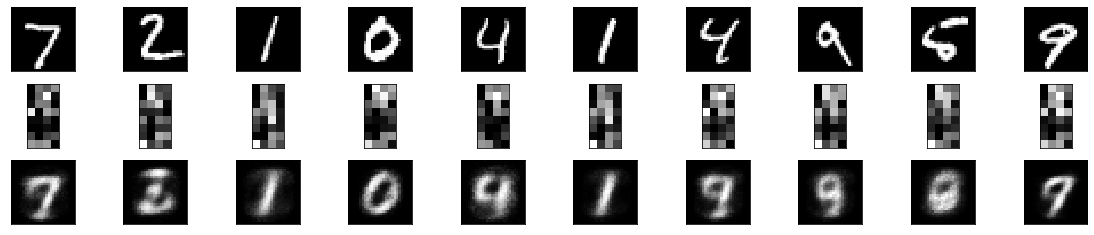

In [21]:
# Let’s plot the original input, encoded images and the reconstructed images using matplotlib

plt.figure(figsize=(40, 4))
for i in range(10):
    # display original
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display encoded image
    ax = plt.subplot(3, 20, i + 1 + 20)
    plt.imshow(encoded_imgs[i].reshape(8,4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
     # display reconstruction
    ax = plt.subplot(3, 20, 2*20 +i+ 1)
    plt.imshow(predicted[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [22]:
# We now train the autoencoder using the training data with 50 epochs and batch size of 256. We also shuffle the training data

autoencoder.fit(X_train, X_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 4s 70us/step - loss: 0.1929 - acc: 0.8001 - val_loss: 0.1869 - val_acc: 0.8001
Epoch 2/50
60000/60000 [==============================] - 4s 70us/step - loss: 0.1847 - acc: 0.8012 - val_loss: 0.1797 - val_acc: 0.8012
Epoch 3/50
60000/60000 [==============================] - 4s 71us/step - loss: 0.1781 - acc: 0.8023 - val_loss: 0.1737 - val_acc: 0.8021
Epoch 4/50
60000/60000 [==============================] - 4s 69us/step - loss: 0.1726 - acc: 0.8032 - val_loss: 0.1686 - val_acc: 0.8030
Epoch 5/50
60000/60000 [==============================] - 4s 70us/step - loss: 0.1676 - acc: 0.8040 - val_loss: 0.1640 - val_acc: 0.8042
Epoch 6/50
60000/60000 [==============================] - 4s 70us/step - loss: 0.1632 - acc: 0.8048 - val_loss: 0.1597 - val_acc: 0.8047
Epoch 7/50
60000/60000 [==============================] - 4s 71us/step - loss: 0.1591 - acc: 0.8055 - val_loss: 0.1558 - val_acc

In [0]:
# Predicting the test set. We want to view the encoded images as well as the reconstructed images so we fit the test data on both autoencoder as well as encoder

encoded_imgs = encoder.predict(X_test)
predicted = autoencoder.predict(X_test)

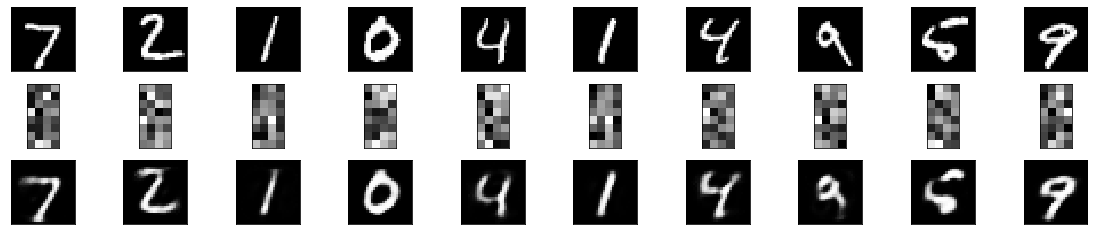

In [25]:
# Let’s plot the original input, encoded images and the reconstructed images using matplotlib

plt.figure(figsize=(40, 4))
for i in range(10):
    # display original
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display encoded image
    ax = plt.subplot(3, 20, i + 1 + 20)
    plt.imshow(encoded_imgs[i].reshape(8,4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
     # display reconstruction
    ax = plt.subplot(3, 20, 2*20 +i+ 1)
    plt.imshow(predicted[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()